# Visualization of RPV samples

In this notebook we'll draw some of the RPV and background QCD samples.

In [29]:
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [3]:
%matplotlib inline

## Load the data

In [1]:
input_file = '/global/cscratch1/sd/sfarrell/atlas-rpv-images/train.h5'

In [35]:
n_load = 32

with h5py.File(input_file, 'r') as f:
    d = f['all_events']
    X = d['hist'][:n_load]
    y = d['y'][:n_load]

## Draw some samples

In [30]:
def draw_image(x, vmin=None, vmax=None, xlabel='$\eta$', ylabel='$\phi$',
               draw_cbar=True, ax=None, figsize=(5,4), **kwargs):
    if ax is None:
        _, ax = plt.subplots(figsize=figsize)
    cax = ax.imshow(x.T, extent=[-2.5, 2.5, -3.15, 3.15],
                    norm=LogNorm(vmin, vmax), aspect='auto',
                    origin='lower', **kwargs)
    if draw_cbar:
        cbar = plt.gcf().colorbar(cax, ax=ax)
        cbar.set_label('Normalized Energy')
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)

In [34]:
# Pick out some RPV and QCD samples
X_qcd = X[y==0]
X_rpv = X[y==1]
X_qcd.shape, X_rpv.shape

((14, 64, 64), (18, 64, 64))

### RPV samples

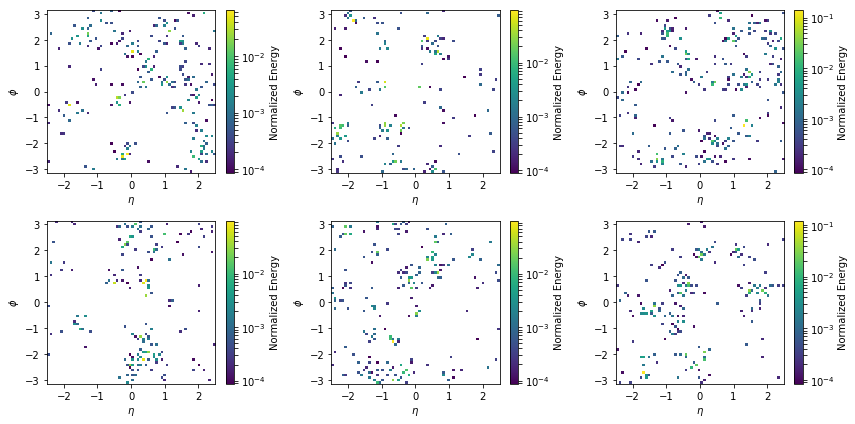

In [42]:
# RPV samples
nrows, ncols = 2, 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))
for i, ax in enumerate(axs.flatten()):
    draw_image(X_rpv[i], ax=ax)
plt.tight_layout()

### QCD samples

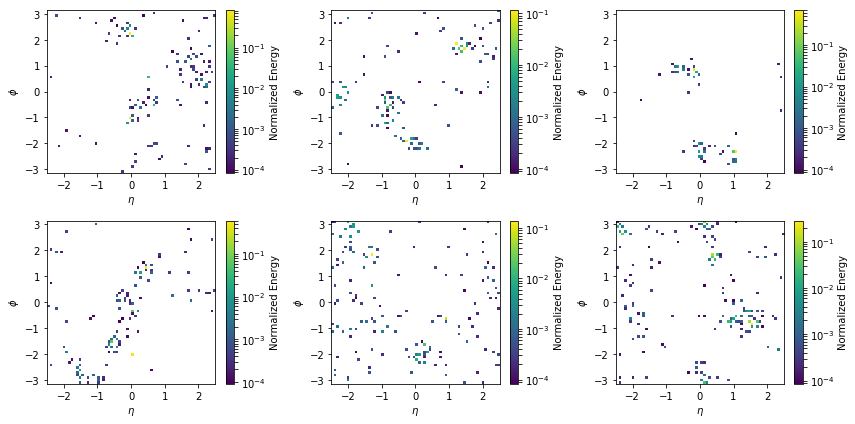

In [43]:
# QCD samples
nrows, ncols = 2, 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))
for i, ax in enumerate(axs.flatten()):
    draw_image(X_qcd[i], ax=ax)
plt.tight_layout()